# Atelier 1 : Apprentissage et classification Automatique 

## A : Apprenstissage non-supervisé

### Jeu de données :
Le jeu de données Iris a été utilisé à l''article classique de Fisher, publié en 1936, intitulé "L'utilisation de plusieurs mesures dans des problèmes taxonomiques", est également disponible dans le référentiel UCI Machine Learning.

Il comprend trois espèces d’iris de 50 échantillons chacune, ainsi que des propriétés propres à chaque fleur. Une espèce de fleur est séparable linéairement des deux autres, mais les deux autres ne sont pas séparables linéairement l'une de l'autre.

Les colonnes de cet ensemble de données sont:

     Id
     Longueur du Sépale Cm
     Largeur du Sépale Cm
     Longueur du Pétale cm
     Largeur du Pétale Cm
     Espèce : classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

## Regroupement (Clustering) et visualisation de données

#### Importation des données
Avec la fonction read_csv de Pandas: on peut mettre dans notre dataframe le contenu du fichier csv, en indiquant comme paramètre (1: le chemin ou la source où se trouve le fichier csv, 2: les séparateurs entre les valeurs dans notre cas ces des vergules) en troisième position, un paramètre facultatif pour spécifier le type d'encodage de notre fichier exemple encoding ="UTF8".

In [1]:
# importation des lib
import pandas as pd

df = pd.read_csv('datasets/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df_features = df[['SepalLengthCm', 'SepalWidthCm', 
                  'PetalLengthCm', 'PetalWidthCm']]



Visualisation des types de fleurs, selon un découpage de variables par paires, en utilisant l'outil pairplot de seaborn. 

Vous pouvez consulter la documentation sur : https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [5]:
# Main flowers species visualization
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(df.drop("Id", axis=1), hue="Species")  #,  diag_kind=False
plt.show()

ModuleNotFoundError: No module named 'seaborn'

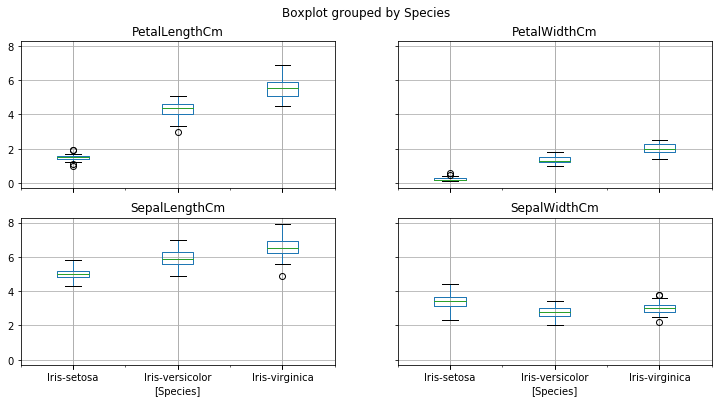

In [13]:
# Visualisation des valeurs de distribution des principales dimensions de plantes 

df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))
plt.show()

### Clustering par l'algorithme K-means



On remarque que la classe (Species) est une chaine de caractères. Pour pouvoir représenter cette information en un tableau ou shéma, il faut transformer ces valeurs en des valeurs entiers.

In [14]:
# Pour voir qulles sont les types de fleurs
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

On peut réaliser cette opération en utilisant le __Label Encoder__ comme suit :

In [15]:
#targetss = df['Species'].ravel()


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df_labels = df['Species']

df_labels



0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=10)
km.fit(df_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [18]:
km.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

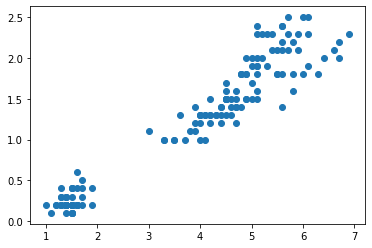

In [19]:
#Visualisation des clusters
plt.scatter(df_features.PetalLengthCm, df_features.PetalWidthCm)



In [20]:
colormap=np.array(['Red','green','blue'])

Text(0.5, 1.0, 'Clustering réel')

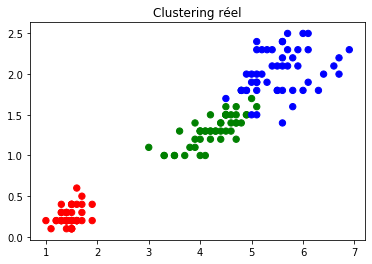

In [21]:
#Visualisation des clusters réels
plt.scatter(df_features.PetalLengthCm, df_features.PetalWidthCm,
            c=colormap[df_labels],s=40)
plt.title('Clustering réel')

Text(0.5, 1.0, 'Clustering prédit')

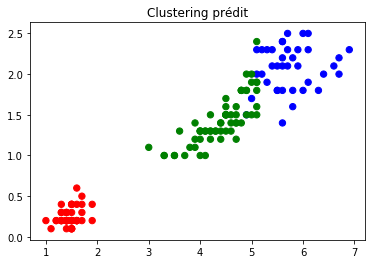

In [22]:
#Visualisation des clusters prédits
plt.scatter(df_features.PetalLengthCm, df_features.PetalWidthCm,
            c=colormap[km.labels_],s=40)
plt.title('Clustering prédit')

Si on veut visualiser le clustering avec les centroids : 

Text(0.5, 1.0, 'Clustering prédit')

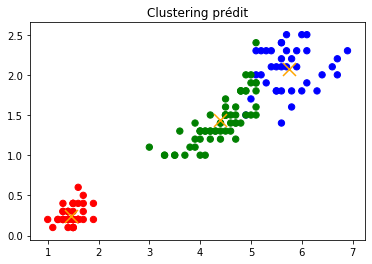

In [23]:
centroids = km.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3],
            marker='x', s=169, linewidths=3,
            color='orange', zorder=10)
plt.scatter(df_features.PetalLengthCm, df_features.PetalWidthCm,
            c=colormap[km.labels_],s=40)

plt.title('Clustering prédit')

#### Evaluation du Clustering

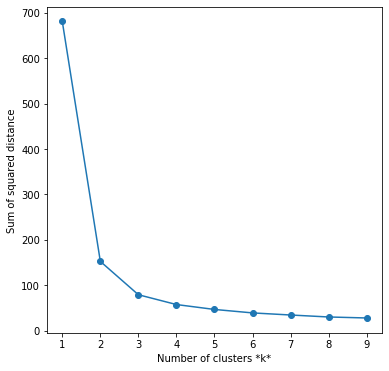

In [24]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_features)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    #for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.6808136202936816)
For n_clusters = 3, silhouette score is 0.5525919445499757)
For n_clusters = 4, silhouette score is 0.4978256901095472)
For n_clusters = 5, silhouette score is 0.4885175508886279)
For n_clusters = 6, silhouette score is 0.3720820853079814)


#### Visualisation 3D des clusters
Si on veut visaliser en 3D les clusters

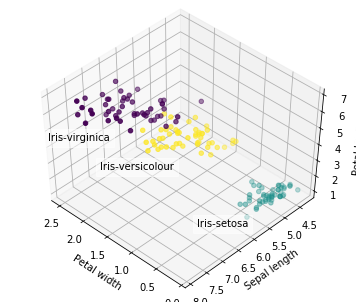

In [26]:
from mpl_toolkits.mplot3d import Axes3D

X = df.drop("Id", axis=1).drop("Species", axis=1).values
y = df_labels

#centers = [[1, 1], [-1, -1], [1, -1]]
centers = [[0, 0], [0, 0], [0, 0]]

# Plot the ground truth
fig = plt.figure(1, figsize=(5, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
for name, label in [('Iris-setosa', 0),
                    ('Iris-versicolour', 1),
                    ('Iris-virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

## B. La classification supervisée : 
C’est l’opération qui permet de placer chaque individu de la population dans une classe parmi l’ensemble des classes préétablies, en suivant un processus d’apprentissage supervisé. 
le choix de la classe d’un individu dépend de ses caractéristiques.

- Algorithme KNN (K Nearest Neighbors)
- Arbre de décision 
- Machine à vecteurs de support (SVM)
- Réseau de neurones
- ...

### Problématique:
#### Données :
- Une liste d’exemples X {1..n} caractérisés par un ensemble d’attributs P. 
- Un ensemble C de classes préétablies.   
- Les caractéristiques d'un nouvel exemple «newX».
#### Question :
-  Quelle est la classe appropriée à «newX» ?


### Jeu de données :
Le jeu de données Iris a été utilisé à l''article classique de Fisher, publié en 1936, intitulé "L'utilisation de plusieurs mesures dans des problèmes taxonomiques", est également disponible dans le référentiel UCI Machine Learning.

Il comprend trois espèces d’iris de 50 échantillons chacune, ainsi que des propriétés propres à chaque fleur. Une espèce de fleur est séparable linéairement des deux autres, mais les deux autres ne sont pas séparables linéairement l'une de l'autre.

Les colonnes de cet ensemble de données sont:

     Id
     Longueur du Sépale Cm
     Largeur du Sépale Cm
     Longueur du Pétale cm
     Largeur du Pétale Cm
     Espèce : classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

### A. importation des librairies
Avec Pandas on peut manipuler lire (et/ou écrire) nos jeux de données, généralement avec une extension .csv

In [27]:
# importation des lib 

import pandas as pd


### B. Importation des données
Avec la fonction read_csv de Pandas: on peut mettre dans notre dataframe le contenu du fichier csv, en indiquant comme paramètre (1: le chemin ou la source où se trouve le fichier csv, 2: les séparateurs entre les valeurs dans notre cas ces des vergules) en troisième position, un paramètre facultatif pour spécifier le type d'encodage de notre fichier exemple encoding ="UTF8".

In [28]:
df = pd.read_csv('datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### QUESTION 1
Quelle est la moyenne de la longueure des petales de la setosa ?

### Reponse 1

In [29]:
# Il y a plein de manière d'écrire cette commande
rep = df[df["Species"]=='Iris-setosa'].PetalLengthCm.mean()

#df[df.Outcome==1].SkinThickness.mean()
#df[df["Outcome"]==1]["SkinThickness"].mean()

rep

1.464

## QUESTION 2
Quelle est la longueure maximale des sepales de la setosa ?

In [30]:
rep = df[df["Species"]=='Iris-setosa'].SepalLengthCm.max()

rep

5.8

### C. Statistiques descriptives élémentaires
Lire les informations sur nos données (Types d'attributs, valeurs manquantes...) Pandas nous permet de voir les informations sur notre benchmark exemple: avec dataframe.info() il nous affiche tout les attributs de notre fichier avec le type de donnée et le nombre de valeurs de chaque colonne
dataframe.columns permet de citer les noms de toutes les colonnes

In [31]:
df.info() #donner les infos de notre data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB



On peut supprimer la colonne ID :

df.drop('Id',axis=1,inplace=True) 

#dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe



### D. préparation des données
Dans cette étape nous déterminons les attributs choisis pour l'entrainement et nous définissons l'attribut "classe" de notre benchmark

In [32]:
# définir les attraibuts qui nous intéréssent 
df_features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]

In [33]:
# définir l'attribut classe
df_labels = df[['Species']]

In [34]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Si on veut schématiser la distribution des classes, il suffit de faire appel à la libraire seaborn, en suite définir l'attribut concerné

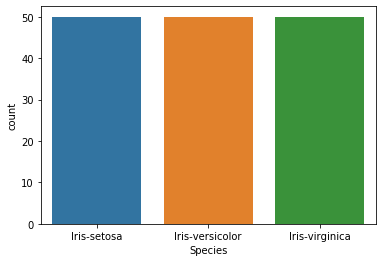

In [35]:

import seaborn as sns
# schématiser la distribution des classes
sns.countplot(df['Species'])

### E. Transformer la colonne des classes en labels numériques

In [36]:
df_labelss=df['Species']#.ravel()
df_labelss

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df_labels = df['Species']

df_labels


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## F. Diviser le dataset en données d'entrainement et données de teste
Ceci est réalisable avec sklearn qui permet de prendre aléatoirement des données de teste à partir du benchmark et laisser le reste pour l'apprentissage.
La fonction train_test_split(param1,param2,param3,param4) prends 4 paramétres:
le premier dédié à l'ensemble d'entrainement, le deuxième à l'ensemble de teste, le troisième c'est le paramètre du % de l'ensemble de test (généralement entre 15 et 40%), 

le 4 ème paramétre (facultatif) pour spécifier quel type de fonction random utiliser:
si vous utilisez random_state = some_number, vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2, c'est-à-dire que votre split sera toujours le même. Peu importe ce que le nombre réel random_state est 42, 0, 21, ... L'important est que chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que vous faites la division. Ceci est utile si vous voulez des résultats reproductibles, par exemple dans la documentation, afin que tout le monde puisse toujours voir les mêmes nombres lors de l'exécution des exemples.

Cette fonction retourne 4 sorties: 
La 1ere est le sous-ensembles aléatoires d'entrainement 
La 2éme est le vecteur de leurs labels (leurs classes).
La 3ème est le sous-ensemble aléatoire pour le teste.
La 4ème est le vecteur de leurs labels (leurs classes).



In [38]:
from sklearn.model_selection import train_test_split
#decouper le data set en 30% pour test et 70% pour train
X_train, X_test, y_train, y_test = train_test_split(df_features, 
                                                    df_labels, test_size=0.4,
                                                    random_state=42)

.shape permet de savoir la dimension d'un ensemble.

In [39]:
print('x_train shape:', X_train.shape) # .shape permet de voir la
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (90, 4)
x_test shape: (60, 4)
y_train shape: (90,)
y_test shape: (60,)


In [40]:
X_train.shape[0]

90

### Méthode des K plus proches Voisins ( K nearest neigbors)

In [41]:
from sklearn.neighbors import KNeighborsClassifier # le classifieur

In [42]:

# Definir l'algorithme que je veux utiliser (KNN) avec le paramètre k=3
mon_knn = KNeighborsClassifier(n_neighbors=3)

#fitting : Lancer l'apprentissage ( données,labels)
mon_knn.fit(X_train, y_train)#.values.ravel())
# Evaluer l'entrainement de mon modèle
train_score = mon_knn.score(X_train, y_train)
print('train score = ',train_score )


train score =  0.9555555555555556


In [43]:

print('---- L Ensemble de test ----- \n',X_test)
#ypred : contient les prédictions de l'ensemble de teste
ypred = mon_knn.predict(X_test)
print('---- Les classes prédites par mon Algo ----- \n',ypred)
print('---- Les classes réelles ----- \n',y_test)

---- L Ensemble de test ----- 
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
18             5.7           3.8            1.7           0.3
118            7.7           2.6            6.9           2.3
78             6.0           2.9            4.5           1.5
76             6.8           2.8            4.8           1.4
31             5.4           3.4            1.5           0.4
64             5.6           2.9            3.6           1.3
141            6.9           3.1            5.1           2.3
68             6.2           2.2            4.5           1.5
82             5.8           2.7            3.9           1.2
110            6.5           3.2            5.1           2.0
12             4.8           3.0            1.4           0.1
36             5.5           3.5            1.3           0.2
9              4.9           3.1            1.5           0.1
19             5.1           3.8      

### Evaluation du modèle
#### A. Accuracy : 
Documentation sur accuracy_score de sk-learn ici : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy%20score#sklearn.metrics.accuracy_score

In [44]:
from sklearn.metrics import accuracy_score # Evaluation
print ('KNN accuracy score')
print (accuracy_score(y_test, ypred))

KNN accuracy score
0.9833333333333333


#### B. Par Validation Croisée :
Documentation sur la validation croisée de sk-learn ici : https://scikit-learn.org/stable/modules/cross_validation.html

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mon_knn, X_train, y_train, cv=5)
#scores = cross_val_score(mon_knn, df_features, df_labels, cv=5)
scores

array([0.95      , 0.84210526, 0.94117647, 1.        , 0.94117647])

In [46]:
print("par validation croisée:  " , scores.mean())

par validation croisée:   0.934891640866873


#### C. Recall, Precision et F-score:
documentation sur recall/ precision 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall%20score#sklearn.metrics.recall_score

In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score # Evaluation
print ('KNN recall score')
print (recall_score(y_test, ypred, average=None))
print ('KNN precision score')
print (precision_score(y_test, ypred,average=None))
print ('f1 score')
print (f1_score(y_test, ypred,average=None))

KNN recall score
[1.         1.         0.94444444]
KNN precision score
[1.   0.95 1.  ]
f1 score
[1.         0.97435897 0.97142857]


Documentation sur la F-score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1%20score#sklearn.metrics.f1_score

#### D. Par matrice de confusion

In [48]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test, ypred))


[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


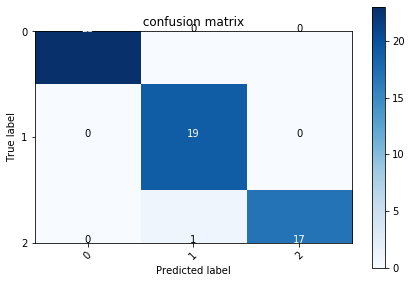

In [49]:
# Function to plot confusion matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False,  title=' confusion matrix ', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = mon_knn.predict(X_test)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred , axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_test#np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

## Méthode des arbres de décision
Je vous invite à consulter la documentation détaillée de cette méthode sur le site de sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=treeclassifier#sklearn.tree.DecisionTreeClassifier

In [50]:
# De la meme manière que pour le KNN

#importer l'algorithme tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

#fitting : Lancer l'apprentissage ( données,labels)
clf.fit(X_train, y_train)

# Evaluer l'entrainement de mon modèle
train_score = clf.score(X_train, y_train)
print('train score = ',train_score )


train score =  0.9666666666666667


In [51]:
#ypred : contient les prédictions de l'ensemble de teste
ypred = clf.predict(X_test)

print ('Decision tree accuracy score')
print (accuracy_score(y_test, ypred))

Decision tree accuracy score
0.9833333333333333


#### Ploter mon arbre de decision

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

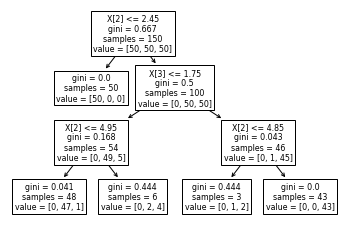

In [52]:
#tree.DecisionTreeClassifier(max_depth=3)
tree.plot_tree(clf.fit(df_features, df_labels),max_depth=5)

#### Une autre manière de schématiser un arbre de decision:

In [54]:
from sklearn.tree.export import export_text
from sklearn import tree
algo_tree = tree.DecisionTreeClassifier(max_depth=3)
algo_tree = algo_tree.fit(df_features, df_labels)
r = export_text(clf , feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ])
print(r)

|--- PetalLengthCm <= 2.45
|   |--- class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



In [55]:
ypred = clf.predict(X_test)

print ('Tree accuracy score')

print (accuracy_score(y_test, ypred))

Tree accuracy score
1.0


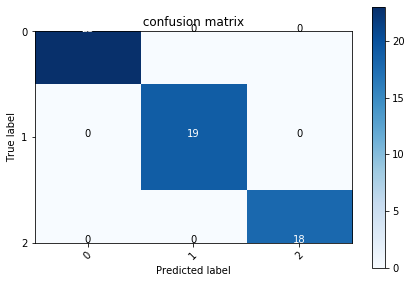

In [56]:
confusion_mtx = confusion_matrix(Y_true, ypred)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

In [57]:
confusion_mtx

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]])

### Exercice  :
En se basant sur ce notebook :
- Ajouter un code qui cherche les meilleurs paramètres pour chaque méthode. ( vous pouvez utiliser gridsearch)
- Ajouter d'autre méthodes de classification à ce notebook ( exmple: Naive Bayes, SVM, Random Forest, Réseaux de neurones multi-couches ... etc)
- Evaluer toutes vos méthodes par validation croisée (nbr de paquet = 5).